In [3]:
import pandas as pd
import numpy as np
import re
ndf = pd.read_csv("OpenKontiLUQS_NO_2010-2019.csv", sep =  ";", skiprows = 2)
np.random.seed(0)



In [4]:
ndf

,Datum,Zeit,AABU NO 1H Mittelwert [�g/m�],BIEL NO 1H Mittelwert [�g/m�],BONN NO 1H Mittelwert [�g/m�],BORG NO 1H Mittelwert [�g/m�],BOTT NO 1H Mittelwert [�g/m�],CHOR NO 1H Mittelwert [�g/m�],DATT NO 1H Mittelwert [�g/m�],DDCS NO 1H Mittelwert [�g/m�],...,VMS2 NO 1H Mittelwert [�g/m�],VOBM NO 1H Mittelwert [�g/m�],VREB NO 1H Mittelwert [�g/m�],VSCH NO 1H Mittelwert [�g/m�],VSGK NO 1H Mittelwert [�g/m�],VWEL NO 1H Mittelwert [�g/m�],WALS NO 1H Mittelwert [�g/m�],WAST NO 1H Mittelwert [�g/m�],WESE NO 1H Mittelwert [�g/m�],WULA NO 1H Mittelwert [�g/m�]
0,01.01.2010,01:00,<7,<7,16,<7,12,17,<7,46,...,<7,NaN,54,NaN,NaN,37,<7,<7,<7,NaN
1,01.01.2010,02:00,<7,<7,NaN,<7,<7,<7,<7,55,...,<7,NaN,24,NaN,NaN,11,<7,<7,<7,NaN
2,01.01.2010,03:00,<7,<7,<7,<7,<7,<7,<7,28,...,<7,NaN,17,NaN,NaN,12,<7,<7,<7,NaN
3,01.01.2010,04:00,<7,<7,<7,<7,<7,<7,<7,12,...,<7,NaN,11,NaN,NaN,<7,<7,<7,<7,NaN
4,01.01.2010,05:00,<7,<7,<7,<7,<7,<7,<7,13,...,<7,NaN,9,NaN,NaN,<7,<7,<7,<7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,<7,<7,26,<7,<7,93,25,17,...,39,19,NaN,NaN,20,10,63,<7,8,<7
87644,31.12.2019,21:00,<7,<7,47,<7,<7,81,31,34,...,27,25,NaN,NaN,13,24,69,<7,16,<7
87645,31.12.2019,22:00,<7,<7,22,<7,<7,65,40,46,...,25,9,NaN,NaN,8,42,72,<7,13,11
87646,31.12.2019,23:00,<7,<7,<7,<7,<7,38,33,40,...,36,13,NaN,NaN,10,42,NaN,<7,7,12


In [5]:
for col in ndf.columns:
    print(col)

Datum
Zeit
AABU NO 1H Mittelwert [�g/m�]
BIEL NO 1H Mittelwert [�g/m�]
BONN NO 1H Mittelwert [�g/m�]
BORG NO 1H Mittelwert [�g/m�]
BOTT NO 1H Mittelwert [�g/m�]
CHOR NO 1H Mittelwert [�g/m�]
DATT NO 1H Mittelwert [�g/m�]
DDCS NO 1H Mittelwert [�g/m�]
DLOH NO 1H Mittelwert [�g/m�]
DMD2 NO 1H Mittelwert [�g/m�]
DUBR NO 1H Mittelwert [�g/m�]
DUB2 NO 1H Mittelwert [�g/m�]
DURH NO 1H Mittelwert [�g/m�]
DWER NO 1H Mittelwert [�g/m�]
EIFE NO 1H Mittelwert [�g/m�]
ELAN NO 1H Mittelwert [�g/m�]
ELSB NO 1H Mittelwert [�g/m�]
EVOG NO 1H Mittelwert [�g/m�]
GELS NO 1H Mittelwert [�g/m�]
GRGG NO 1H Mittelwert [�g/m�]
HATT NO 1H Mittelwert [�g/m�]
HUE2 NO 1H Mittelwert [�g/m�]
INLA NO 1H Mittelwert [�g/m�]
JACK NO 1H Mittelwert [�g/m�]
JHNK NO 1H Mittelwert [�g/m�]
KRHA NO 1H Mittelwert [�g/m�]
KRIN NO 1H Mittelwert [�g/m�]
LEV2 NO 1H Mittelwert [�g/m�]
LOER NO 1H Mittelwert [�g/m�]
MGRH NO 1H Mittelwert [�g/m�]
MSGE NO 1H Mittelwert [�g/m�]
NERH NO 1H Mittelwert [�g/m�]
NETT NO 1H Mittelwert [�g/m�]

In [6]:
ndf.columns

Index(['Datum', 'Zeit', 'AABU NO 1H Mittelwert [�g/m�]',
       'BIEL NO 1H Mittelwert [�g/m�]', 'BONN NO 1H Mittelwert [�g/m�]',
       'BORG NO 1H Mittelwert [�g/m�]', 'BOTT NO 1H Mittelwert [�g/m�]',
       'CHOR NO 1H Mittelwert [�g/m�]', 'DATT NO 1H Mittelwert [�g/m�]',
       'DDCS NO 1H Mittelwert [�g/m�]', 'DLOH NO 1H Mittelwert [�g/m�]',
       'DMD2 NO 1H Mittelwert [�g/m�]', 'DUBR NO 1H Mittelwert [�g/m�]',
       'DUB2 NO 1H Mittelwert [�g/m�]', 'DURH NO 1H Mittelwert [�g/m�]',
       'DWER NO 1H Mittelwert [�g/m�]', 'EIFE NO 1H Mittelwert [�g/m�]',
       'ELAN NO 1H Mittelwert [�g/m�]', 'ELSB NO 1H Mittelwert [�g/m�]',
       'EVOG NO 1H Mittelwert [�g/m�]', 'GELS NO 1H Mittelwert [�g/m�]',
       'GRGG NO 1H Mittelwert [�g/m�]', 'HATT NO 1H Mittelwert [�g/m�]',
       'HUE2 NO 1H Mittelwert [�g/m�]', 'INLA NO 1H Mittelwert [�g/m�]',
       'JACK NO 1H Mittelwert [�g/m�]', 'JHNK NO 1H Mittelwert [�g/m�]',
       'KRHA NO 1H Mittelwert [�g/m�]', 'KRIN NO 1H Mittelwert [�g/

In [7]:
ndf.fillna(0 , inplace = True)

In [8]:
ndf

,Datum,Zeit,AABU NO 1H Mittelwert [�g/m�],BIEL NO 1H Mittelwert [�g/m�],BONN NO 1H Mittelwert [�g/m�],BORG NO 1H Mittelwert [�g/m�],BOTT NO 1H Mittelwert [�g/m�],CHOR NO 1H Mittelwert [�g/m�],DATT NO 1H Mittelwert [�g/m�],DDCS NO 1H Mittelwert [�g/m�],...,VMS2 NO 1H Mittelwert [�g/m�],VOBM NO 1H Mittelwert [�g/m�],VREB NO 1H Mittelwert [�g/m�],VSCH NO 1H Mittelwert [�g/m�],VSGK NO 1H Mittelwert [�g/m�],VWEL NO 1H Mittelwert [�g/m�],WALS NO 1H Mittelwert [�g/m�],WAST NO 1H Mittelwert [�g/m�],WESE NO 1H Mittelwert [�g/m�],WULA NO 1H Mittelwert [�g/m�]
0,01.01.2010,01:00,<7,<7,16,<7,12,17,<7,46,...,<7,0,54,0,0,37,<7,<7,<7,0
1,01.01.2010,02:00,<7,<7,0,<7,<7,<7,<7,55,...,<7,0,24,0,0,11,<7,<7,<7,0
2,01.01.2010,03:00,<7,<7,<7,<7,<7,<7,<7,28,...,<7,0,17,0,0,12,<7,<7,<7,0
3,01.01.2010,04:00,<7,<7,<7,<7,<7,<7,<7,12,...,<7,0,11,0,0,<7,<7,<7,<7,0
4,01.01.2010,05:00,<7,<7,<7,<7,<7,<7,<7,13,...,<7,0,9,0,0,<7,<7,<7,<7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,<7,<7,26,<7,<7,93,25,17,...,39,19,0,0,20,10,63,<7,8,<7
87644,31.12.2019,21:00,<7,<7,47,<7,<7,81,31,34,...,27,25,0,0,13,24,69,<7,16,<7
87645,31.12.2019,22:00,<7,<7,22,<7,<7,65,40,46,...,25,9,0,0,8,42,72,<7,13,11
87646,31.12.2019,23:00,<7,<7,<7,<7,<7,38,33,40,...,36,13,0,0,10,42,0,<7,7,12


In [9]:
ndf_col=['Datum',
'Zeit',
'Aachen1',
'Bielefeld1',
'Bonn',
'Borken',
'Bottrop1',
'Cologne1',
'Datteln',
'Duesseldorf1',
'Duesseldorf2',
'Dortmund1',
'Duisburg1',
'Duisburg2',
'Duisburg3',
'Duesseldorf3',
'Simmerath',
'Essen1',
'Elsdorf',
'Essen2',
'Gelsenkirchen1',
'Grevenbroich',
'Hattingen',
'Huerth',
'Inden',
'Jackerath',
'Juchen',
'Krefeld1',
'Krefeld2',
'Leverkusen1',
'Duesseldorf4',
'Moenchengladbach1',
'Muenster1',
'Neuss',
'Nettetal',
'Lunen',
'Ratingen',
'Recklinghausen1',
'Cologne2',
'Netphen',
'Schwerte1',
'Soest',
'Solingen1',
'Muelheim1',
'Unna',
'Aachen2',
'Bielefeld2',
'Bielefeld3',
'Bielefeld4',
'Bochum',
'Bottrop2',
'Dinslaken',
'Duren',
'Dortmund2',
'Dortmund3',
'Duesseldorf5',
'Duisburg4',
'Essen3',
'Essen4',
'Emmerich',
'Essen5',
'Gelsenkirchen2',
'Gladbeck',
'Hagen',
'Herne',
'Iserlohn',
'Cologne3',
'Cologne4',
'Leverkusen2',
'Luedenscheid',
'Mettmann',
'Moenchengladbach2',
'Moenchengladbach3',
'Muelheim2',
'Muenster2',
'Oberhausen',
'Recklinghausen2',
'Schwerte2',
'Solingen2',
'Wuppertal1',
'Duisburg5',
'Warstein',
'Wesel',
'Wuppertal2']

In [10]:
ndf_col

['Datum',
 'Zeit',
 'Aachen1',
 'Bielefeld1',
 'Bonn',
 'Borken',
 'Bottrop1',
 'Cologne1',
 'Datteln',
 'Duesseldorf1',
 'Duesseldorf2',
 'Dortmund1',
 'Duisburg1',
 'Duisburg2',
 'Duisburg3',
 'Duesseldorf3',
 'Simmerath',
 'Essen1',
 'Elsdorf',
 'Essen2',
 'Gelsenkirchen1',
 'Grevenbroich',
 'Hattingen',
 'Huerth',
 'Inden',
 'Jackerath',
 'Juchen',
 'Krefeld1',
 'Krefeld2',
 'Leverkusen1',
 'Duesseldorf4',
 'Moenchengladbach1',
 'Muenster1',
 'Neuss',
 'Nettetal',
 'Lunen',
 'Ratingen',
 'Recklinghausen1',
 'Cologne2',
 'Netphen',
 'Schwerte1',
 'Soest',
 'Solingen1',
 'Muelheim1',
 'Unna',
 'Aachen2',
 'Bielefeld2',
 'Bielefeld3',
 'Bielefeld4',
 'Bochum',
 'Bottrop2',
 'Dinslaken',
 'Duren',
 'Dortmund2',
 'Dortmund3',
 'Duesseldorf5',
 'Duisburg4',
 'Essen3',
 'Essen4',
 'Emmerich',
 'Essen5',
 'Gelsenkirchen2',
 'Gladbeck',
 'Hagen',
 'Herne',
 'Iserlohn',
 'Cologne3',
 'Cologne4',
 'Leverkusen2',
 'Luedenscheid',
 'Mettmann',
 'Moenchengladbach2',
 'Moenchengladbach3',
 'Muelh

In [11]:
ndf.columns = ndf_col

In [12]:
ndf

,Datum,Zeit,Aachen1,Bielefeld1,Bonn,Borken,Bottrop1,Cologne1,Datteln,Duesseldorf1,...,Muenster2,Oberhausen,Recklinghausen2,Schwerte2,Solingen2,Wuppertal1,Duisburg5,Warstein,Wesel,Wuppertal2
0,01.01.2010,01:00,<7,<7,16,<7,12,17,<7,46,...,<7,0,54,0,0,37,<7,<7,<7,0
1,01.01.2010,02:00,<7,<7,0,<7,<7,<7,<7,55,...,<7,0,24,0,0,11,<7,<7,<7,0
2,01.01.2010,03:00,<7,<7,<7,<7,<7,<7,<7,28,...,<7,0,17,0,0,12,<7,<7,<7,0
3,01.01.2010,04:00,<7,<7,<7,<7,<7,<7,<7,12,...,<7,0,11,0,0,<7,<7,<7,<7,0
4,01.01.2010,05:00,<7,<7,<7,<7,<7,<7,<7,13,...,<7,0,9,0,0,<7,<7,<7,<7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,<7,<7,26,<7,<7,93,25,17,...,39,19,0,0,20,10,63,<7,8,<7
87644,31.12.2019,21:00,<7,<7,47,<7,<7,81,31,34,...,27,25,0,0,13,24,69,<7,16,<7
87645,31.12.2019,22:00,<7,<7,22,<7,<7,65,40,46,...,25,9,0,0,8,42,72,<7,13,11
87646,31.12.2019,23:00,<7,<7,<7,<7,<7,38,33,40,...,36,13,0,0,10,42,0,<7,7,12


In [13]:
ndf_sorted_col=['Datum',
'Zeit',
'Aachen1',
'Aachen2',
'Bielefeld1',
'Bielefeld2',
'Bielefeld3',
'Bielefeld4',
'Bonn',
'Borken',
'Bottrop1',
'Bottrop2',
'Cologne1',
'Cologne2',
'Cologne3',
'Cologne4',
'Datteln',
'Duesseldorf1',
'Duesseldorf2',
'Duesseldorf3',
'Duesseldorf4',
'Duesseldorf5',
'Dortmund1',
'Dortmund2',
'Dortmund3',
'Duisburg1',
'Duisburg2',
'Duisburg3',
'Duisburg4',
'Duisburg5',
'Simmerath',
'Essen1',
'Essen2',
'Essen3',
'Essen4',
'Essen5',
'Elsdorf',
'Gelsenkirchen1',
'Gelsenkirchen2',
'Grevenbroich',
'Hattingen',
'Huerth',
'Inden',
'Jackerath',
'Juchen',
'Krefeld1',
'Krefeld2',
'Leverkusen1',
'Leverkusen2',
'Moenchengladbach1',
'Moenchengladbach2',
'Moenchengladbach3',
'Muenster1',
'Muenster2',
'Muelheim1',
'Muelheim2',
'Neuss',
'Nettetal',
'Lunen',
'Ratingen',
'Recklinghausen1',
'Recklinghausen2',
'Netphen',
'Schwerte1',
'Schwerte2',
'Soest',
'Solingen1',
'Solingen2',
'Unna',
'Bochum',
'Dinslaken',
'Duren',
'Emmerich',
'Gladbeck',
'Hagen',
'Herne',
'Iserlohn',
'Luedenscheid',
'Mettmann',
'Oberhausen',
'Wuppertal1',
'Wuppertal2',
'Warstein',
'Wesel']

In [14]:
dfno = ndf[ndf_sorted_col]

In [15]:
dfno

,Datum,Zeit,Aachen1,Aachen2,Bielefeld1,Bielefeld2,Bielefeld3,Bielefeld4,Bonn,Borken,...,Hagen,Herne,Iserlohn,Luedenscheid,Mettmann,Oberhausen,Wuppertal1,Wuppertal2,Warstein,Wesel
0,01.01.2010,01:00,<7,49,<7,0,0,<7,16,<7,...,0,0,40,0,0,0,37,0,<7,<7
1,01.01.2010,02:00,<7,43,<7,0,0,0,0,<7,...,0,0,14,0,0,0,11,0,<7,<7
2,01.01.2010,03:00,<7,34,<7,0,0,<7,<7,<7,...,0,0,12,0,0,0,12,0,<7,<7
3,01.01.2010,04:00,<7,24,<7,0,0,<7,<7,<7,...,0,0,7,0,0,0,<7,0,<7,<7
4,01.01.2010,05:00,<7,17,<7,0,0,<7,<7,<7,...,0,0,8,0,0,0,<7,0,<7,<7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,<7,12,<7,13,20,0,26,<7,...,95,0,0,0,0,19,10,<7,<7,8
87644,31.12.2019,21:00,<7,14,<7,<7,18,0,47,<7,...,91,0,0,0,0,25,24,<7,<7,16
87645,31.12.2019,22:00,<7,11,<7,<7,13,0,22,<7,...,76,0,0,0,0,9,42,11,<7,13
87646,31.12.2019,23:00,<7,11,<7,0,20,0,<7,<7,...,82,0,0,0,0,13,42,12,<7,7


In [39]:
dfno1 = pd.read_csv('NO_1.csv', sep = ",")

In [40]:
dfno1.columns

Index(['Unnamed: 0', 'Datum', 'Zeit', 'Aachen1', 'Aachen2', 'Bielefeld1',
       'Bielefeld2', 'Bielefeld3', 'Bielefeld4', 'Bonn', 'Borken', 'Bottrop1',
       'Bottrop2', 'Cologne1', 'Cologne2', 'Cologne3', 'Cologne4', 'Datteln',
       'Duesseldorf1', 'Duesseldorf2', 'Duesseldorf3', 'Duesseldorf4',
       'Duesseldorf5', 'Dortmund1', 'Dortmund2', 'Dortmund3', 'Duisburg1',
       'Duisburg2', 'Duisburg3', 'Duisburg4', 'Duisburg5', 'Simmerath',
       'Essen1', 'Essen2', 'Essen3', 'Essen4', 'Essen5', 'Elsdorf',
       'Gelsenkirchen1', 'Gelsenkirchen2', 'Grevenbroich', 'Hattingen',
       'Huerth', 'Inden', 'Jackerath', 'Juchen', 'Krefeld1', 'Krefeld2',
       'Leverkusen1', 'Leverkusen2', 'Moenchengladbach1', 'Moenchengladbach2',
       'Moenchengladbach3', 'Muenster1', 'Muenster2', 'Muelheim1', 'Muelheim2',
       'Neuss', 'Nettetal', 'Lunen', 'Ratingen', 'Recklinghausen1',
       'Recklinghausen2', 'Netphen', 'Schwerte1', 'Schwerte2', 'Soest',
       'Solingen1', 'Solingen2', 'Unna'

In [41]:
dfno1.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [42]:
dfno1

,Datum,Zeit,Aachen1,Aachen2,Bielefeld1,Bielefeld2,Bielefeld3,Bielefeld4,Bonn,Borken,...,Hagen,Herne,Iserlohn,Luedenscheid,Mettmann,Oberhausen,Wuppertal1,Wuppertal2,Warstein,Wesel
0,01.01.2010,01:00,7,49,7,0,0,7,16,7,...,0,0,40,0,0,0,37,0,7,7
1,01.01.2010,02:00,7,43,7,0,0,0,0,7,...,0,0,14,0,0,0,11,0,7,7
2,01.01.2010,03:00,7,34,7,0,0,7,7,7,...,0,0,12,0,0,0,12,0,7,7
3,01.01.2010,04:00,7,24,7,0,0,7,7,7,...,0,0,7,0,0,0,7,0,7,7
4,01.01.2010,05:00,7,17,7,0,0,7,7,7,...,0,0,8,0,0,0,7,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,7,12,7,13,20,0,26,7,...,95,0,0,0,0,19,10,7,7,8
87644,31.12.2019,21:00,7,14,7,7,18,0,47,7,...,91,0,0,0,0,25,24,7,7,16
87645,31.12.2019,22:00,7,11,7,7,13,0,22,7,...,76,0,0,0,0,9,42,11,7,13
87646,31.12.2019,23:00,7,11,7,0,20,0,7,7,...,82,0,0,0,0,13,42,12,7,7


In [43]:
dfno1['Aachen'] = dfno1.loc[: , "Aachen1": "Aachen2"].mean(axis = 1)
dfno1['Bielefeld'] = dfno1.loc[: , "Bielefeld1":"Bielefeld4"].mean(axis = 1)
dfno1['Bottrop'] = dfno1.loc[:,"Bottrop1":"Bottrop2"].mean(axis = 1)
dfno1['Cologne'] = dfno1.loc[: , "Cologne1":"Cologne4"].mean(axis = 1)
dfno1['Duesseldorf'] = dfno1.loc[: , "Duesseldorf1":"Duesseldorf5"].mean(axis = 1)
dfno1['Dortmund'] = dfno1.loc[: , "Dortmund1":"Dortmund3"].mean(axis = 1)
dfno1['Duisburg'] = dfno1.loc[: , "Duisburg1":"Duisburg5"].mean(axis = 1)
dfno1['Essen'] = dfno1.loc[: , "Essen1":"Essen5"].mean(axis = 1)
dfno1['Gelsenkirchen'] = dfno1.loc[: , "Gelsenkirchen1":"Gelsenkirchen2"].mean(axis = 1)
dfno1['Krefeld'] = dfno1.loc[: , "Krefeld1":"Krefeld2"].mean(axis = 1)
dfno1['Leverkusen'] = dfno1.loc[: , "Leverkusen1":"Leverkusen2"].mean(axis = 1)
dfno1['Moenchengladbach'] = dfno1.loc[: , "Moenchengladbach1":"Moenchengladbach3"].mean(axis = 1)
dfno1['Muenster'] = dfno1.loc[: , "Muenster1":"Muenster2"].mean(axis = 1)
dfno1['Muelheim'] = dfno1.loc[: , "Muelheim1":"Muelheim2"].mean(axis = 1)
dfno1['Recklinghausen'] = dfno1.loc[: , "Recklinghausen1":"Recklinghausen2"].mean(axis = 1)
dfno1['Schwerte'] = dfno1.loc[: , "Schwerte1":"Schwerte2"].mean(axis = 1)
dfno1['Solingen'] = dfno1.loc[: , "Solingen1":"Solingen2"].mean(axis = 1)
dfno1['Wuppertal'] = dfno1.loc[: , "Wuppertal1":"Wuppertal2"].mean(axis = 1)








In [44]:
dfno1

,Datum,Zeit,Aachen1,Aachen2,Bielefeld1,Bielefeld2,Bielefeld3,Bielefeld4,Bonn,Borken,...,Gelsenkirchen,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal
0,01.01.2010,01:00,7,49,7,0,0,7,16,7,...,7.0,11.5,5.5,33.666667,7.0,3.5,27.0,3.5,0.0,18.5
1,01.01.2010,02:00,7,43,7,0,0,0,0,7,...,3.5,7.5,3.5,8.333333,7.0,3.5,12.0,3.5,0.0,5.5
2,01.01.2010,03:00,7,34,7,0,0,7,7,7,...,3.5,7.0,3.5,6.333333,7.0,3.5,8.5,3.5,0.0,6.0
3,01.01.2010,04:00,7,24,7,0,0,7,7,7,...,3.5,3.5,3.5,4.666667,7.0,3.5,5.5,3.5,0.0,3.5
4,01.01.2010,05:00,7,17,7,0,0,7,7,7,...,3.5,7.0,3.5,2.333333,7.0,3.5,4.5,3.5,0.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,7,12,7,13,20,0,26,7,...,15.0,3.5,40.5,5.333333,23.0,3.5,0.0,3.5,13.5,8.5
87644,31.12.2019,21:00,7,14,7,7,18,0,47,7,...,14.0,3.5,29.5,6.666667,17.0,3.5,0.0,3.5,10.0,15.5
87645,31.12.2019,22:00,7,11,7,7,13,0,22,7,...,29.5,3.5,44.0,20.333333,16.0,3.5,0.0,3.5,7.5,26.5
87646,31.12.2019,23:00,7,11,7,0,20,0,7,7,...,39.0,3.5,28.5,9.000000,23.0,0.0,0.0,3.5,8.5,27.0


In [45]:
dfno1.drop(['Aachen1', 'Aachen2', 'Bielefeld1', 'Bielefeld2',
       'Bielefeld3', 'Bielefeld4','Bottrop1', 'Bottrop2',
       'Cologne1', 'Cologne2', 'Cologne3', 'Cologne4',
       'Duesseldorf1', 'Duesseldorf2', 'Duesseldorf3', 'Duesseldorf4',
       'Duesseldorf5', 'Dortmund1', 'Dortmund2', 'Dortmund3', 'Duisburg1',
       'Duisburg2', 'Duisburg3', 'Duisburg4', 'Duisburg5',
       'Essen1', 'Essen2', 'Essen3', 'Essen4', 'Essen5',
       'Gelsenkirchen1', 'Gelsenkirchen2','Krefeld1', 'Krefeld2',
       'Leverkusen1', 'Leverkusen2', 'Moenchengladbach1', 'Moenchengladbach2',
       'Moenchengladbach3', 'Muenster1', 'Muenster2', 'Muelheim1', 'Muelheim2','Recklinghausen1',
       'Recklinghausen2','Schwerte1', 'Schwerte2',
       'Solingen1', 'Solingen2', 'Wuppertal1', 'Wuppertal2'], axis = 1, inplace = True) 

In [46]:
dfno1

,Datum,Zeit,Bonn,Borken,Datteln,Simmerath,Elsdorf,Grevenbroich,Hattingen,Huerth,...,Gelsenkirchen,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal
0,01.01.2010,01:00,16,7,7,7,0,7,0,17,...,7.0,11.5,5.5,33.666667,7.0,3.5,27.0,3.5,0.0,18.5
1,01.01.2010,02:00,0,7,7,7,0,7,0,7,...,3.5,7.5,3.5,8.333333,7.0,3.5,12.0,3.5,0.0,5.5
2,01.01.2010,03:00,7,7,7,7,0,7,0,7,...,3.5,7.0,3.5,6.333333,7.0,3.5,8.5,3.5,0.0,6.0
3,01.01.2010,04:00,7,7,7,7,0,7,0,7,...,3.5,3.5,3.5,4.666667,7.0,3.5,5.5,3.5,0.0,3.5
4,01.01.2010,05:00,7,7,7,7,0,7,0,7,...,3.5,7.0,3.5,2.333333,7.0,3.5,4.5,3.5,0.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,31.12.2019,20:00,26,7,25,7,32,0,7,18,...,15.0,3.5,40.5,5.333333,23.0,3.5,0.0,3.5,13.5,8.5
87644,31.12.2019,21:00,47,7,31,7,22,0,7,47,...,14.0,3.5,29.5,6.666667,17.0,3.5,0.0,3.5,10.0,15.5
87645,31.12.2019,22:00,22,7,40,7,13,0,7,32,...,29.5,3.5,44.0,20.333333,16.0,3.5,0.0,3.5,7.5,26.5
87646,31.12.2019,23:00,7,7,33,7,12,0,7,9,...,39.0,3.5,28.5,9.000000,23.0,0.0,0.0,3.5,8.5,27.0


In [47]:
dfno1.columns

Index(['Datum', 'Zeit', 'Bonn', 'Borken', 'Datteln', 'Simmerath', 'Elsdorf',
       'Grevenbroich', 'Hattingen', 'Huerth', 'Inden', 'Jackerath', 'Juchen',
       'Neuss', 'Nettetal', 'Lunen', 'Ratingen', 'Netphen', 'Soest', 'Unna',
       'Bochum', 'Dinslaken', 'Duren', 'Emmerich', 'Gladbeck', 'Hagen',
       'Herne', 'Iserlohn', 'Luedenscheid', 'Mettmann', 'Oberhausen',
       'Warstein', 'Wesel', 'Aachen', 'Bielefeld', 'Bottrop', 'Cologne',
       'Duesseldorf', 'Dortmund', 'Duisburg', 'Essen', 'Gelsenkirchen',
       'Krefeld', 'Leverkusen', 'Moenchengladbach', 'Muenster', 'Muelheim',
       'Recklinghausen', 'Schwerte', 'Solingen', 'Wuppertal'],
      dtype='object')

In [48]:
dfno1.drop(['Zeit', 'Borken', 'Datteln', 'Simmerath', 'Elsdorf',
       'Grevenbroich', 'Hattingen', 'Huerth', 'Inden', 'Jackerath', 'Juchen',
       'Neuss', 'Nettetal', 'Lunen', 'Ratingen', 'Netphen', 'Soest', 'Unna', 'Dinslaken', 'Duren', 'Emmerich', 'Gladbeck', 'Hagen',
       'Herne', 'Iserlohn', 'Luedenscheid', 'Mettmann', 'Oberhausen',
       'Warstein' ], axis = 1, inplace = True)

In [49]:
dfno1.columns

Index(['Datum', 'Bonn', 'Bochum', 'Wesel', 'Aachen', 'Bielefeld', 'Bottrop',
       'Cologne', 'Duesseldorf', 'Dortmund', 'Duisburg', 'Essen',
       'Gelsenkirchen', 'Krefeld', 'Leverkusen', 'Moenchengladbach',
       'Muenster', 'Muelheim', 'Recklinghausen', 'Schwerte', 'Solingen',
       'Wuppertal'],
      dtype='object')

In [50]:
dfno1['Datum']

0        01.01.2010
1        01.01.2010
2        01.01.2010
3        01.01.2010
4        01.01.2010
            ...    
87643    31.12.2019
87644    31.12.2019
87645    31.12.2019
87646    31.12.2019
87647    31.12.2019
Name: Datum, Length: 87648, dtype: object

In [51]:
dfno1['Datum'] = pd.to_datetime(dfno1.Datum)

In [52]:
dfno1.dtypes

Datum               datetime64[ns]
Bonn                         int64
Bochum                       int64
Wesel                        int64
Aachen                     float64
Bielefeld                  float64
Bottrop                    float64
Cologne                    float64
Duesseldorf                float64
Dortmund                   float64
Duisburg                   float64
Essen                      float64
Gelsenkirchen              float64
Krefeld                    float64
Leverkusen                 float64
Moenchengladbach           float64
Muenster                   float64
Muelheim                   float64
Recklinghausen             float64
Schwerte                   float64
Solingen                   float64
Wuppertal                  float64
dtype: object

In [53]:
dfno1['Year'] = dfno1.Datum.dt.year

In [54]:
dfno1

,Datum,Bonn,Bochum,Wesel,Aachen,Bielefeld,Bottrop,Cologne,Duesseldorf,Dortmund,...,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal,Year
0,2010-01-01,16,0,7,28.0,3.50,6.0,30.25,9.2,52.333333,...,11.5,5.5,33.666667,7.0,3.5,27.0,3.5,0.0,18.5,2010
1,2010-01-01,0,0,7,25.0,1.75,3.5,22.00,12.4,18.333333,...,7.5,3.5,8.333333,7.0,3.5,12.0,3.5,0.0,5.5,2010
2,2010-01-01,7,0,7,20.5,3.50,3.5,20.00,7.0,15.333333,...,7.0,3.5,6.333333,7.0,3.5,8.5,3.5,0.0,6.0,2010
3,2010-01-01,7,0,7,15.5,3.50,3.5,7.50,3.8,18.000000,...,3.5,3.5,4.666667,7.0,3.5,5.5,3.5,0.0,3.5,2010
4,2010-01-01,7,0,7,12.0,3.50,3.5,15.25,4.0,13.333333,...,7.0,3.5,2.333333,7.0,3.5,4.5,3.5,0.0,3.5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2019-12-31,26,0,8,9.5,10.00,3.5,80.50,6.2,9.666667,...,3.5,40.5,5.333333,23.0,3.5,0.0,3.5,13.5,8.5,2019
87644,2019-12-31,47,0,16,10.5,8.00,3.5,59.75,10.2,15.000000,...,3.5,29.5,6.666667,17.0,3.5,0.0,3.5,10.0,15.5,2019
87645,2019-12-31,22,0,13,9.0,6.75,3.5,42.50,13.8,7.000000,...,3.5,44.0,20.333333,16.0,3.5,0.0,3.5,7.5,26.5,2019
87646,2019-12-31,7,0,7,9.0,6.75,3.5,20.75,13.0,11.333333,...,3.5,28.5,9.000000,23.0,0.0,0.0,3.5,8.5,27.0,2019


In [55]:
dfno1.drop(['Datum'],axis = 1, inplace = True)

In [56]:
dfno1

,Bonn,Bochum,Wesel,Aachen,Bielefeld,Bottrop,Cologne,Duesseldorf,Dortmund,Duisburg,...,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal,Year
0,16,0,7,28.0,3.50,6.0,30.25,9.2,52.333333,5.8,...,11.5,5.5,33.666667,7.0,3.5,27.0,3.5,0.0,18.5,2010
1,0,0,7,25.0,1.75,3.5,22.00,12.4,18.333333,4.2,...,7.5,3.5,8.333333,7.0,3.5,12.0,3.5,0.0,5.5,2010
2,7,0,7,20.5,3.50,3.5,20.00,7.0,15.333333,4.2,...,7.0,3.5,6.333333,7.0,3.5,8.5,3.5,0.0,6.0,2010
3,7,0,7,15.5,3.50,3.5,7.50,3.8,18.000000,4.2,...,3.5,3.5,4.666667,7.0,3.5,5.5,3.5,0.0,3.5,2010
4,7,0,7,12.0,3.50,3.5,15.25,4.0,13.333333,4.2,...,7.0,3.5,2.333333,7.0,3.5,4.5,3.5,0.0,3.5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,26,0,8,9.5,10.00,3.5,80.50,6.2,9.666667,24.0,...,3.5,40.5,5.333333,23.0,3.5,0.0,3.5,13.5,8.5,2019
87644,47,0,16,10.5,8.00,3.5,59.75,10.2,15.000000,28.0,...,3.5,29.5,6.666667,17.0,3.5,0.0,3.5,10.0,15.5,2019
87645,22,0,13,9.0,6.75,3.5,42.50,13.8,7.000000,22.6,...,3.5,44.0,20.333333,16.0,3.5,0.0,3.5,7.5,26.5,2019
87646,7,0,7,9.0,6.75,3.5,20.75,13.0,11.333333,7.6,...,3.5,28.5,9.000000,23.0,0.0,0.0,3.5,8.5,27.0,2019


<AxesSubplot:>

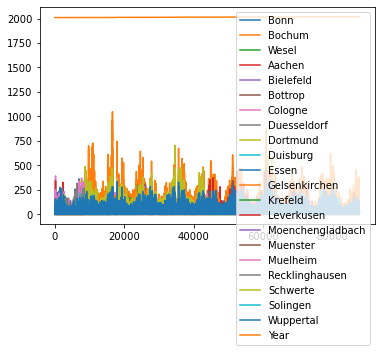

In [57]:
dfno1.plot()

In [58]:
dfno1[dfno1.Year == 2010 ].mean()

Bonn                  16.341781
Bochum                 0.000000
Wesel                 10.685731
Aachen                29.877454
Bielefeld             11.062414
Bottrop                7.159247
Cologne               32.697688
Duesseldorf           13.339909
Dortmund              36.593151
Duisburg              11.406530
Essen                 33.831849
Gelsenkirchen          9.127911
Krefeld                9.508105
Leverkusen             8.242979
Moenchengladbach       4.018836
Muenster              24.343436
Muelheim              29.991838
Recklinghausen        24.853710
Schwerte               6.323402
Solingen               5.301027
Wuppertal             27.042922
Year                2010.000000
dtype: float64

In [59]:
dfno1.to_csv('NO_beta.csv')

In [60]:
dfno2 = dfno1.groupby('Year').mean()

In [61]:
dfno2

,Bonn,Bochum,Wesel,Aachen,Bielefeld,Bottrop,Cologne,Duesseldorf,Dortmund,Duisburg,...,Gelsenkirchen,Krefeld,Leverkusen,Moenchengladbach,Muenster,Muelheim,Recklinghausen,Schwerte,Solingen,Wuppertal
Year,,,,,,,,,,,,,,,,,,,,,
2010,16.341781,0.000000,10.685731,29.877454,11.062414,7.159247,32.697688,13.339909,36.593151,11.406530,...,9.127911,9.508105,8.242979,4.018836,24.343436,29.991838,24.853710,6.323402,5.301027,27.042922
2011,17.209475,51.162443,13.299543,29.695548,12.884989,28.474144,35.275913,13.548516,39.776941,13.602968,...,53.365696,9.921518,8.559817,17.380708,24.539212,9.646975,0.295776,40.841838,4.774772,30.298916
2012,15.436475,52.446949,10.703666,31.834643,11.513633,23.408299,33.548896,13.284449,32.942661,10.196289,...,39.014913,8.197632,7.756432,15.188145,24.720458,6.623691,0.000000,37.888035,4.816826,30.845173
2013,14.505479,0.582648,10.004224,30.382249,11.035674,20.928710,32.616866,15.943813,33.310616,11.238333,...,41.787614,7.652511,7.108676,13.433447,22.807705,6.465925,0.000000,35.324543,5.095491,34.006678
2014,14.665753,0.000000,10.512443,30.602854,10.956421,23.339155,34.975000,15.071507,31.436187,11.969566,...,44.712215,8.044578,7.840126,12.540068,23.160902,6.676941,0.000000,39.412158,4.615354,33.865068
2015,14.643950,0.000000,10.000799,31.068094,11.146347,6.856906,38.573116,17.475571,28.220776,9.883995,...,37.603311,6.803767,29.111530,10.603196,23.207763,5.944292,0.000000,6.666096,4.533676,33.668151
2016,15.423725,0.000000,12.142418,31.160918,11.881034,7.963570,37.142475,12.818283,32.621167,11.689230,...,37.294513,7.940403,30.733208,11.460838,23.624886,7.564321,0.000000,7.059255,4.746528,34.466872
2017,13.289498,0.000000,10.315411,26.363642,9.833904,6.505251,34.983904,11.695114,27.395358,10.270525,...,30.109189,7.090811,29.302511,9.958295,21.016553,6.257021,6.241610,5.965582,24.563014,31.916210
2018,12.906621,0.000000,10.265982,21.699315,18.072003,6.474429,28.267580,9.552009,26.159513,12.039247,...,32.718208,6.811016,23.280023,11.383828,18.086358,5.950514,0.009189,6.290411,17.767180,25.465411


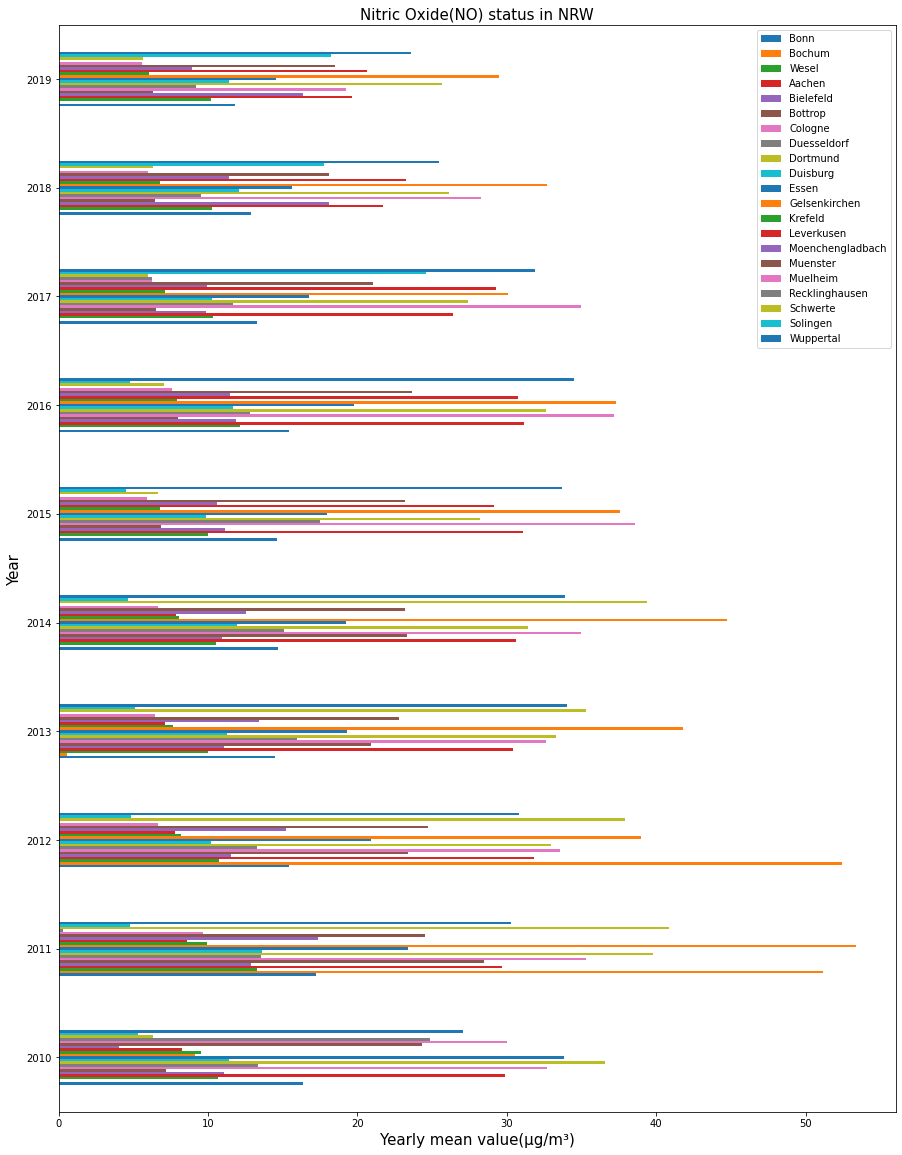

In [62]:
ax = dfno2.plot(kind = "barh",figsize=(15,20), fontsize=10)
ax.set_xlabel("Yearly mean value(µg/m³)",fontsize=15)
ax.set_ylabel("Year",fontsize=15)
ax.set_title("Nitric Oxide(NO) status in NRW",fontsize=15)
fig = ax.get_figure()   
fig.savefig('NO.png')